In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
df.shape

(247, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [9]:
df.describe().T

,count,unique,top,freq
day,246,33,1,8
month,245,5,7,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


In [10]:
df.iloc[121:125:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


# DATA CLEANING

Dropping row no 122 specifying region name & 123 respecifying the header

In [11]:
df.drop([122,123],inplace=True)

In [12]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [13]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
241,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [14]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
df.dropna(inplace=True)

In [36]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [37]:
df.drop(122,inplace=True)

KeyError: '[122] not found in axis'

In [ ]:
df.iloc[121:125:]

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [ ]:
df.dtypes

In [ ]:
df.Classes.unique()

In [38]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [39]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [41]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [42]:
df1=df.drop(["year"],axis=1)

In [43]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# Exploratory Data Analysis

In [44]:
df1["Classes"]=np.where(df1["Classes"]=='not fire',0,1)

In [45]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197


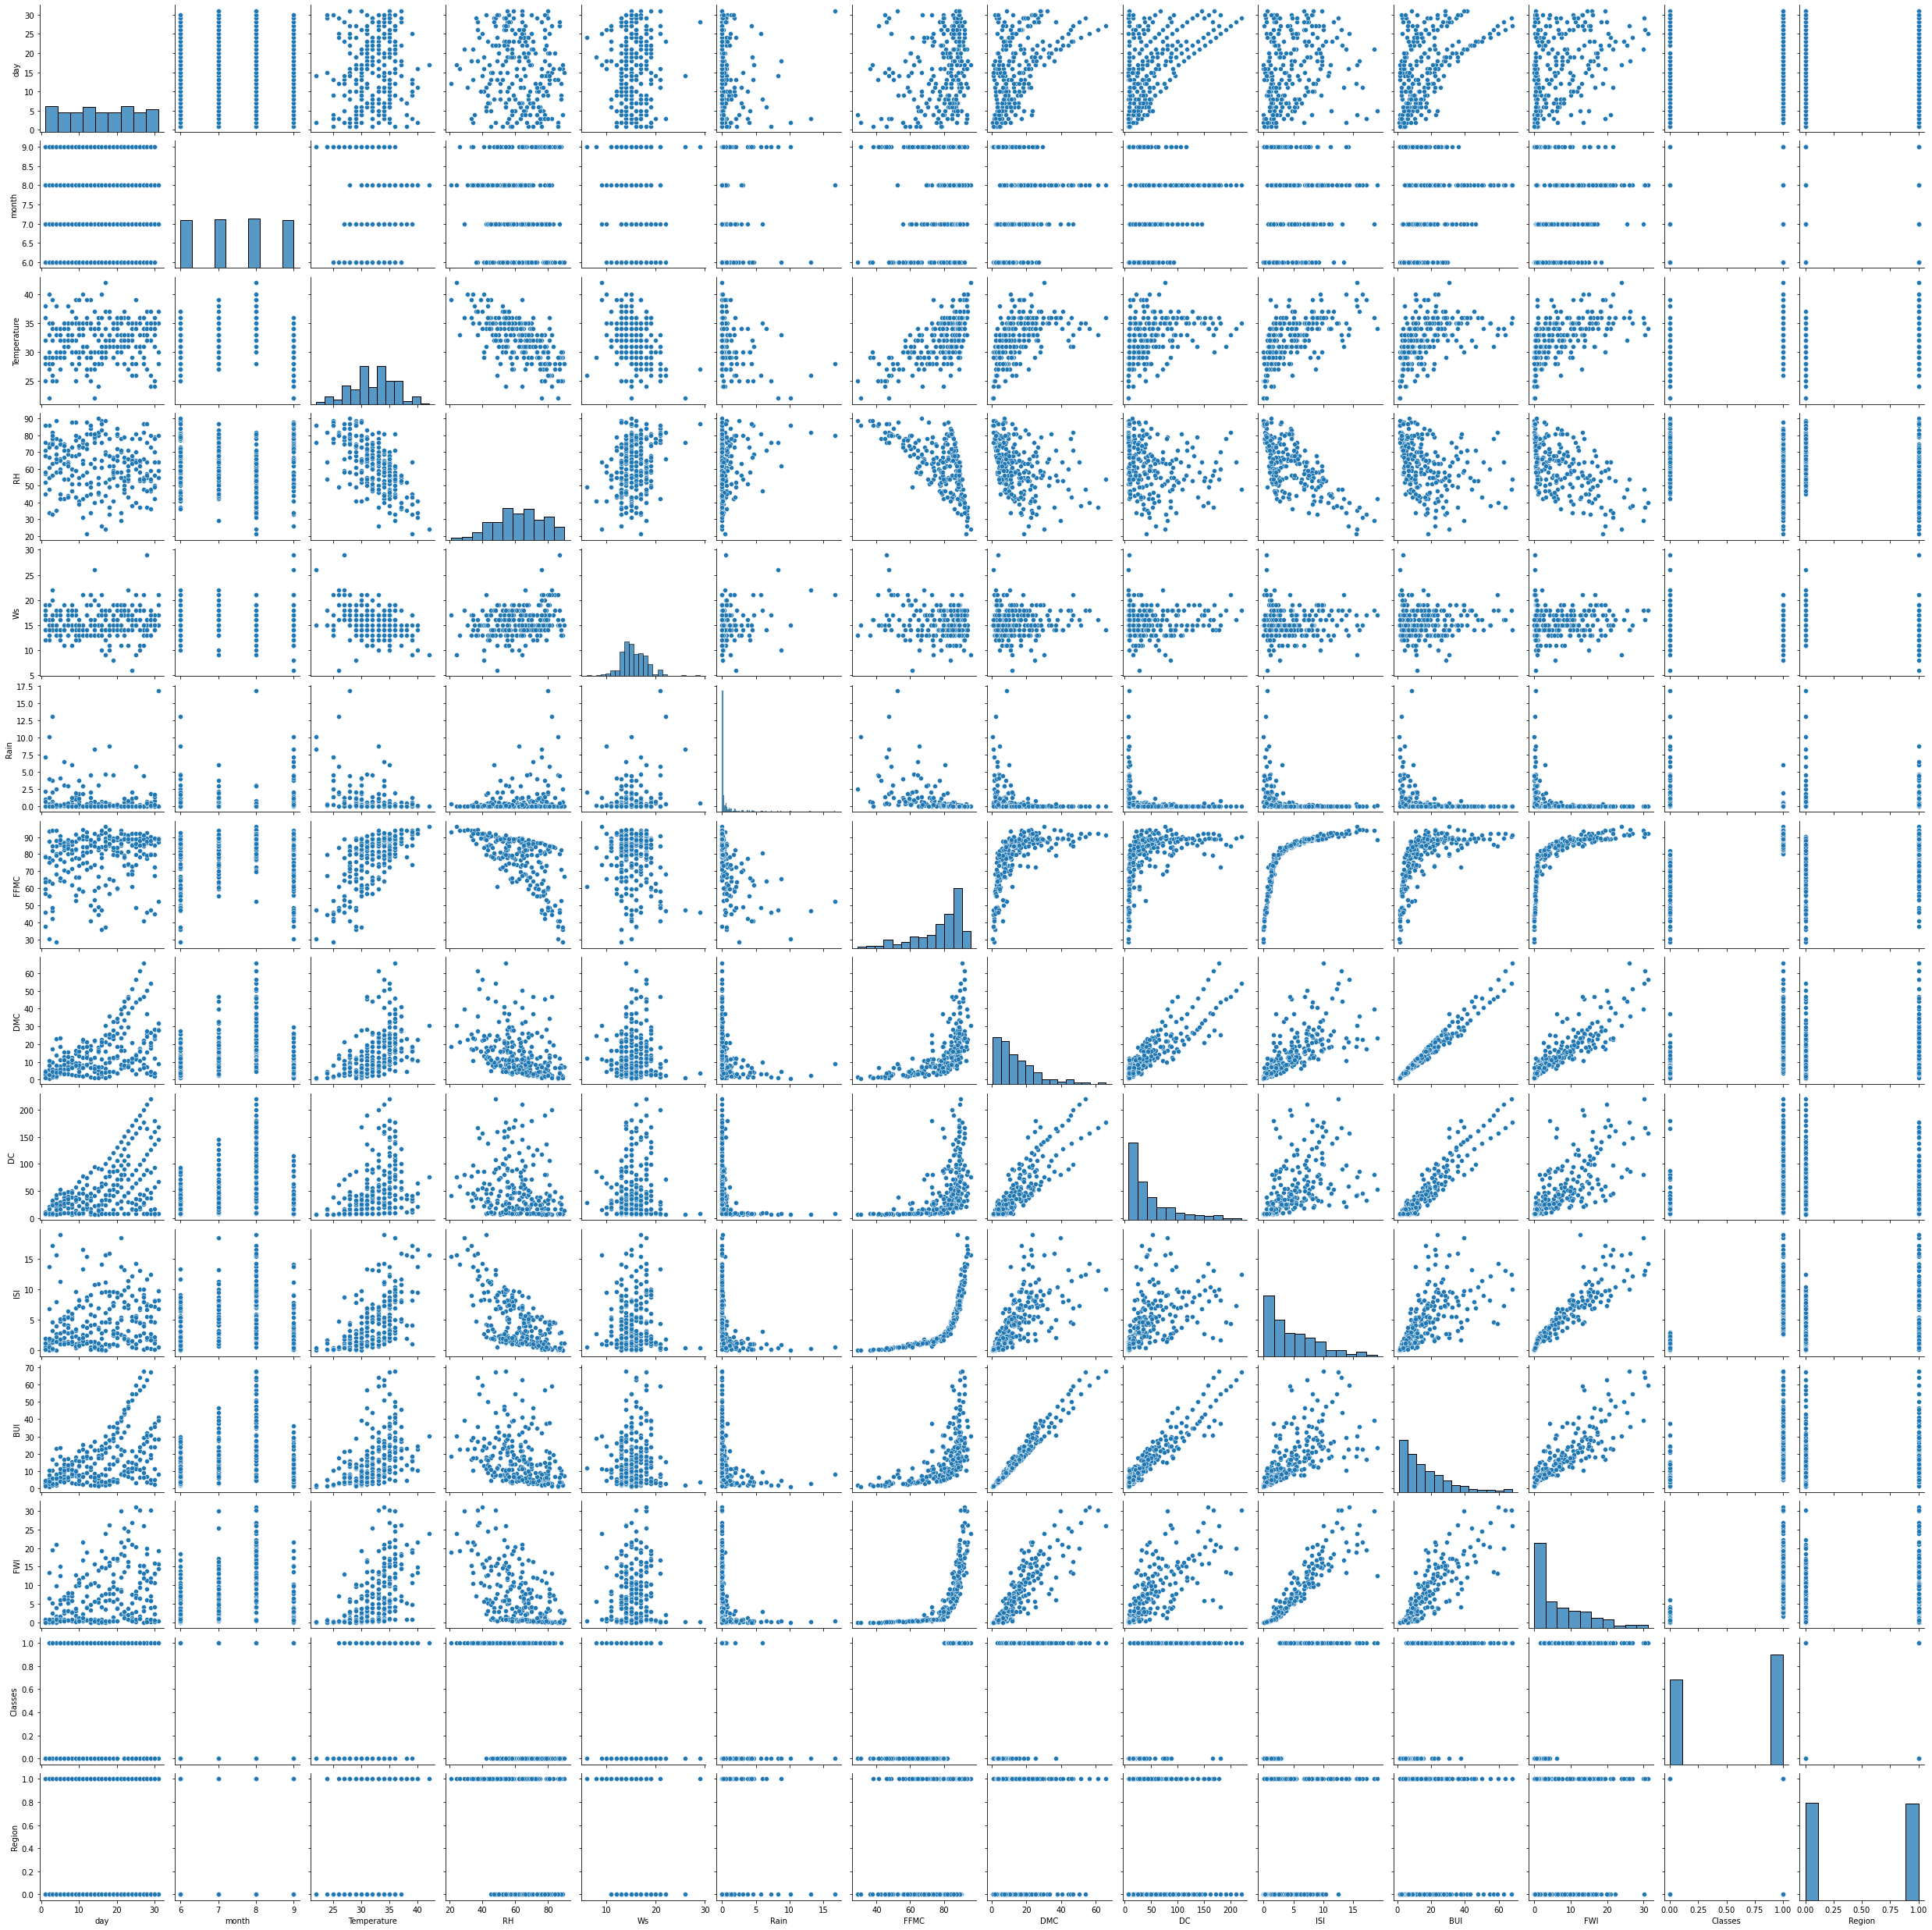

In [47]:
sns.pairplot(df1)

<AxesSubplot:>

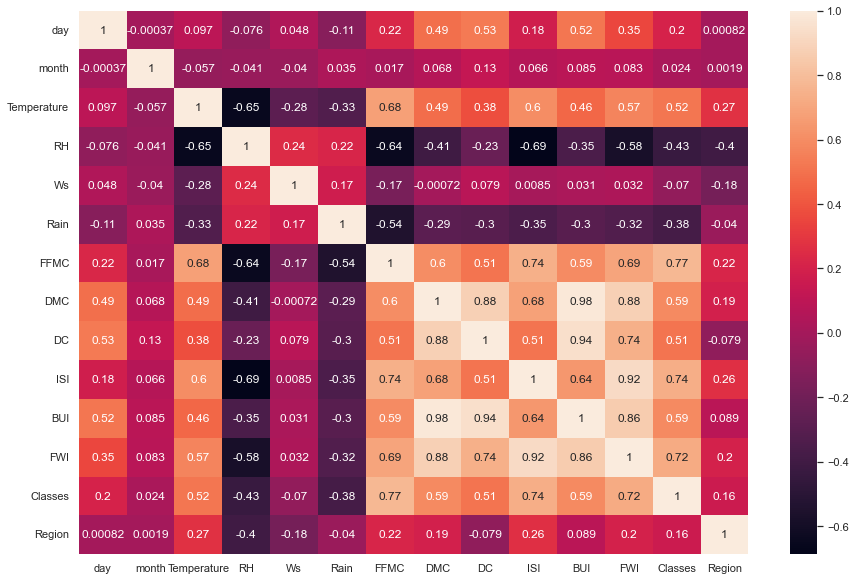

In [48]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

In [50]:
#Report

#- RH is negatively corelated with Temperature, FFMC and ISI
#- Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

In [51]:
df1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Text(0, 0.5, 'Temperature')

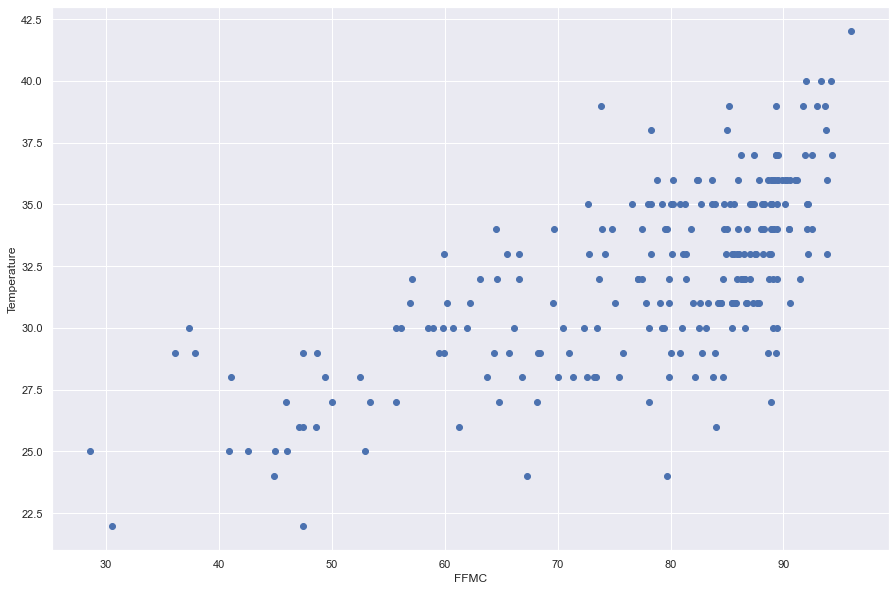

In [52]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

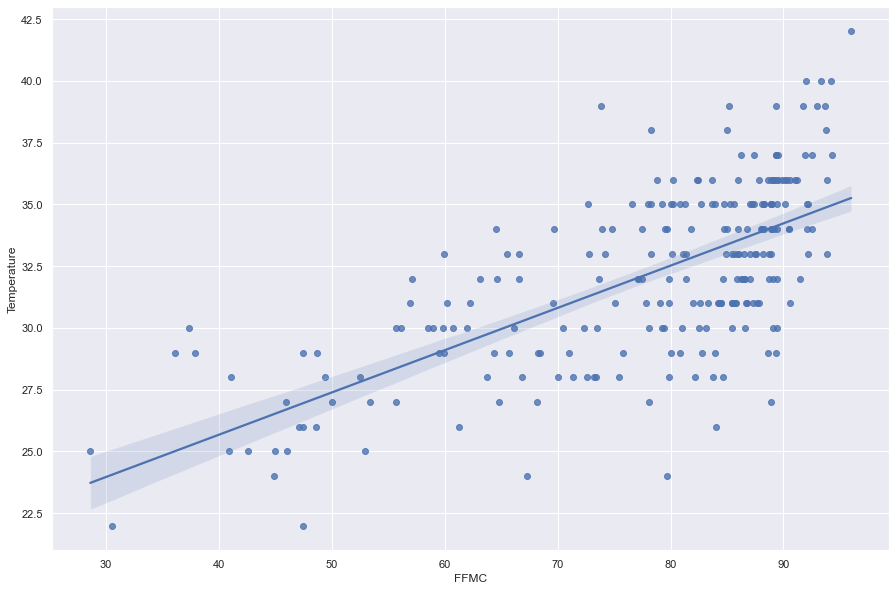

In [53]:
sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

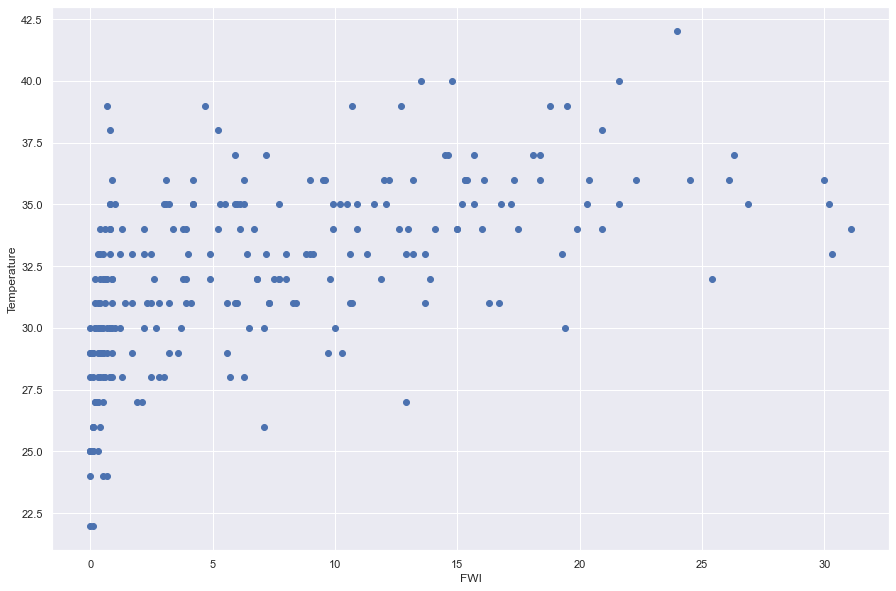

In [54]:
plt.scatter(df1['FWI'],df1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

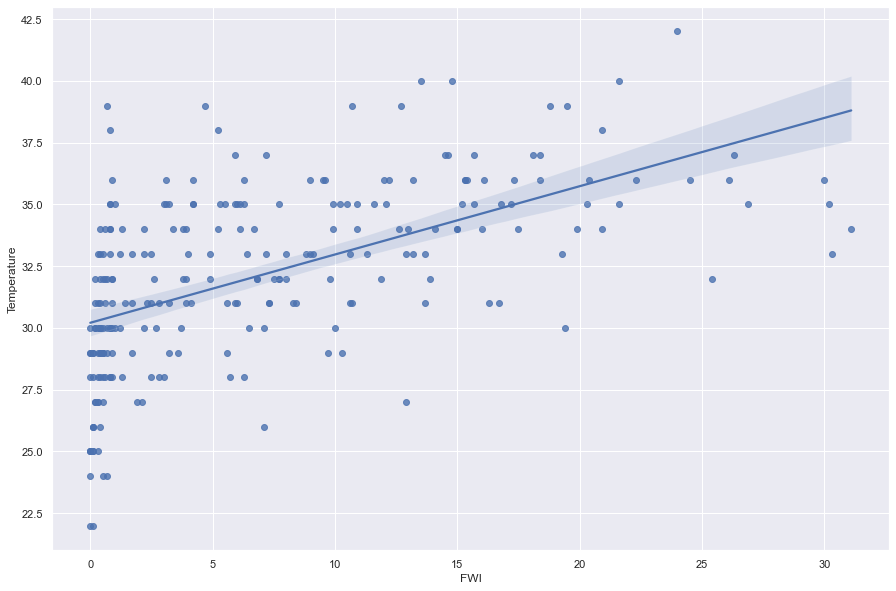

In [55]:
sns.regplot(x='FWI',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

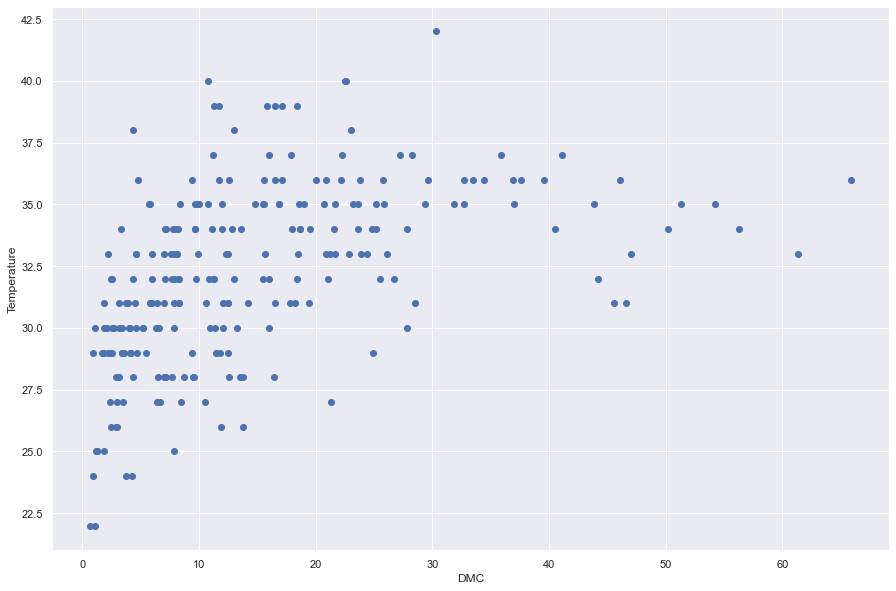

In [56]:
plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

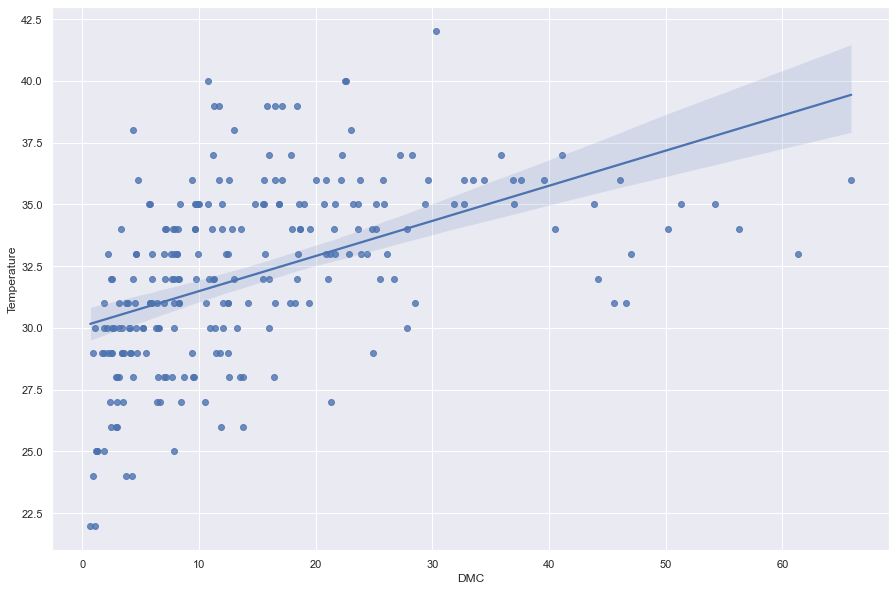

In [57]:
sns.regplot(x='DMC',y='Temperature',data=df1)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

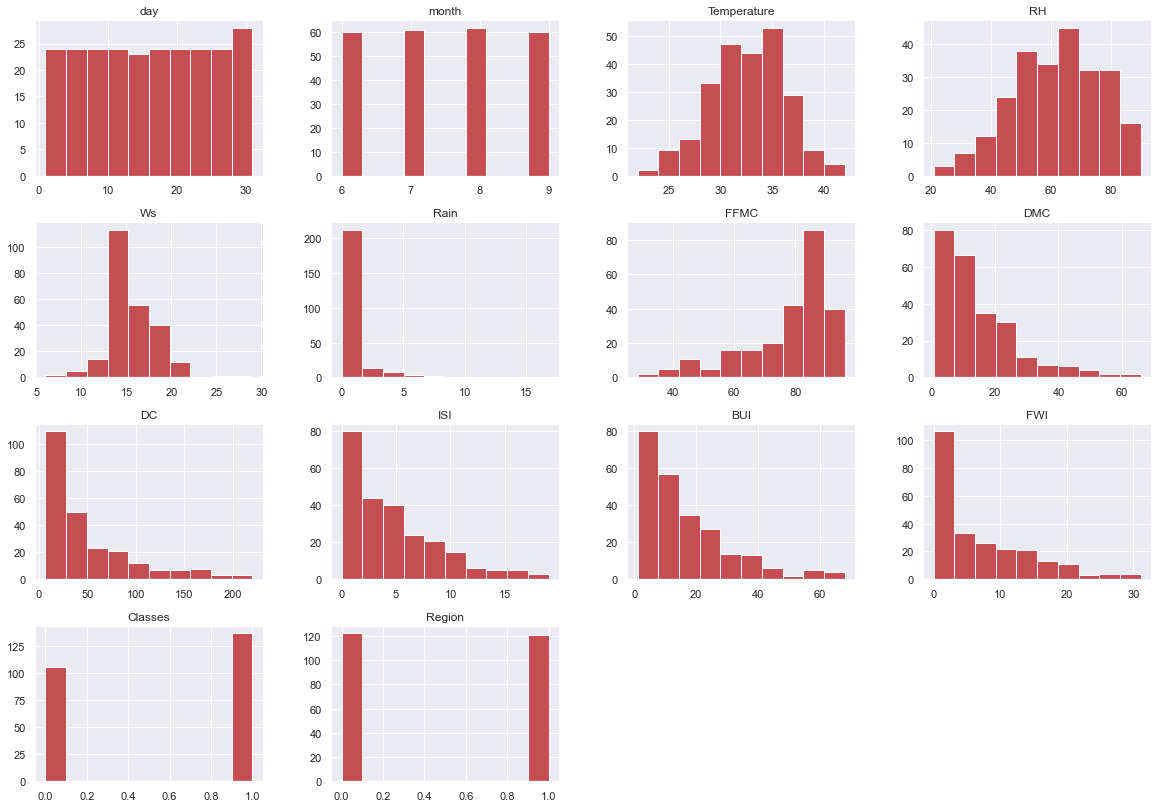

In [58]:
df1.hist(figsize=(20,14),color='r')

In [59]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

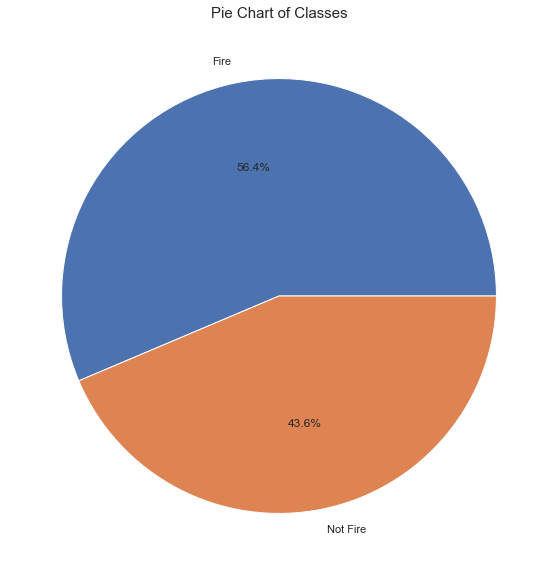

In [60]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

<AxesSubplot:xlabel='Temperature'>

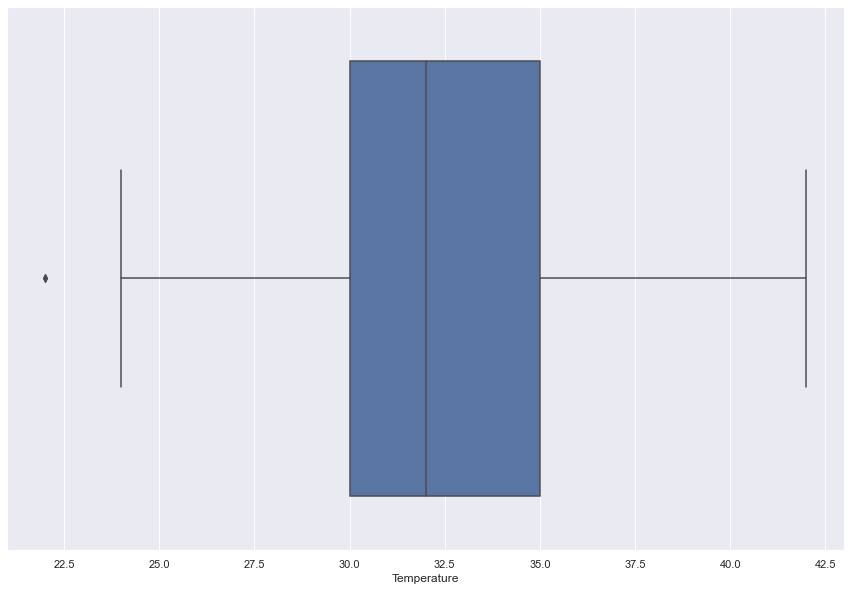

In [61]:
sns.boxplot(df1['Temperature'])


<AxesSubplot:xlabel='FWI'>

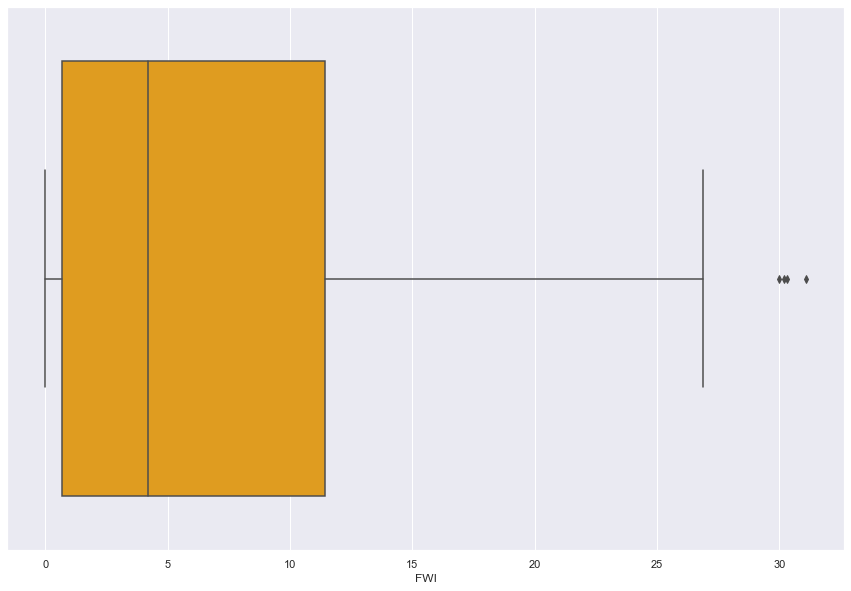

In [62]:
sns.boxplot(df['FWI'],color='orange')

# Building Linear Regression Model

In [63]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
241,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
242,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
243,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [64]:
x=df1.drop('Temperature',axis=1)

In [65]:
y=df1['Temperature']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [67]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,0
175,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0,0
187,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0,0
230,16,9,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1,1
126,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1


In [68]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17,7,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,0
227,13,9,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1
182,30,7,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1,1
116,25,9,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,0,0
125,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,6,6,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1,1
243,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
209,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1,1
102,11,9,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3,0,0


In [69]:
y_train

25     31
121    25
175    31
72     35
187    38
       ..
64     34
15     29
230    33
126    30
9      28
Name: Temperature, Length: 162, dtype: int32

In [70]:
y_test

46     29
227    29
182    36
116    26
125    29
       ..
128    35
243    24
209    33
102    30
78     36
Name: Temperature, Length: 81, dtype: int32

In [71]:
scaler=StandardScaler()

In [72]:
x_train_scaled=scaler.fit_transform(X_train)

In [73]:
x_train_scaled

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.90566259, -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
        -1.10416397, -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.90566259,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.90566259,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
        -1.10416397,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
        -1.10416397, -1.01242284]])

In [74]:
x_test_scaled=scaler.transform(X_test)

In [75]:
x_test_scaled

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.90566259, -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.90566259,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.90566259,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.90566259,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
        -1.10416397, -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.90566259, -1.01242284]])

# MODEL TRAINING

In [77]:
regression = LinearRegression()

In [78]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [81]:
#print the coefficients & intercept
print(regression.coef_)
regression.score(x_test_scaled,y_test)

[-0.36077135 -0.2311454  -1.50045027 -0.70384333 -0.24625832  0.84766384
  0.09164637  0.68596622  0.10380813  0.16594124 -0.38469383  0.18553708
  0.22661524]


0.437054696918155

In [80]:
print(regression.intercept_)

32.074074074074076


In [82]:
reg_pred=regression.predict(x_test_scaled)

In [83]:
reg_pred

array([31.99493488, 33.12664016, 33.32629208, 24.7838569 , 29.2460991 ,
       33.66799244, 31.64931814, 34.58818421, 31.79084174, 32.31038339,
       33.54818002, 33.34754307, 35.78255767, 32.03424221, 34.27923643,
       33.26037242, 26.52877687, 35.94057602, 33.33186761, 23.57110435,
       32.36221708, 32.52712236, 33.06301323, 32.81955926, 29.903744  ,
       32.73791527, 32.89973308, 32.14375238, 31.97567765, 34.09071758,
       34.61315534, 33.87565689, 34.55720694, 32.78051614, 31.25884225,
       28.73433642, 32.57424997, 31.67173881, 33.05658571, 34.00592683,
       33.83451992, 35.61866932, 34.26998499, 37.40865649, 32.90557183,
       36.49959526, 32.27373405, 35.35128002, 30.60009684, 31.10436839,
       32.39267139, 39.0865001 , 32.75773646, 34.64063089, 27.20344681,
       36.86613123, 33.83117207, 33.74796958, 28.98445209, 32.4738513 ,
       32.52599845, 31.99902312, 24.8016617 , 36.29777696, 36.03327802,
       28.94688288, 29.45302718, 29.37313652, 35.96924316, 28.45

# ASSUMPTIONS OF LINEAR REGRESSION

Text(0, 0.5, 'Test Predicted Data')

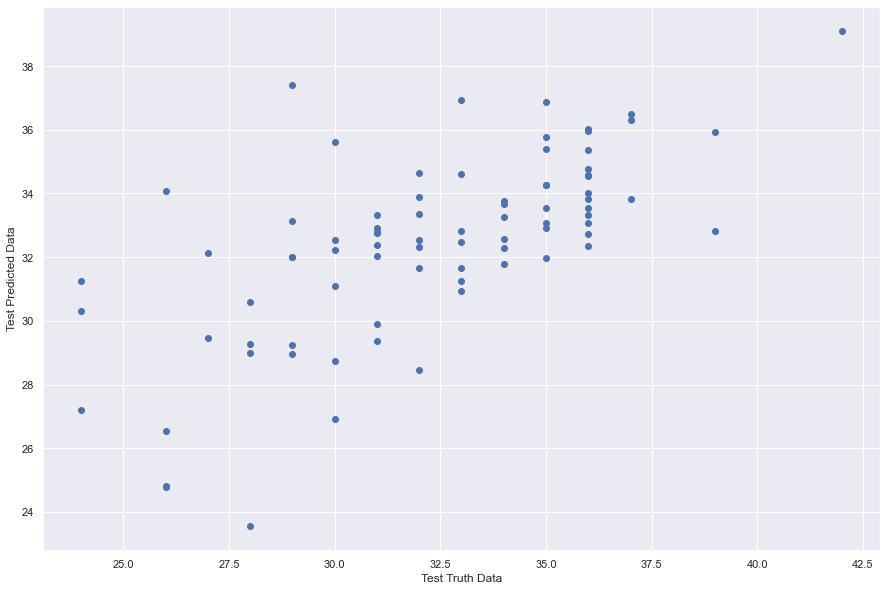

In [84]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [85]:
residuals = y_test-reg_pred

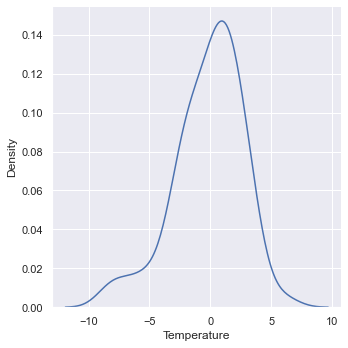

In [88]:
sns.displot(residuals,kind="kde")

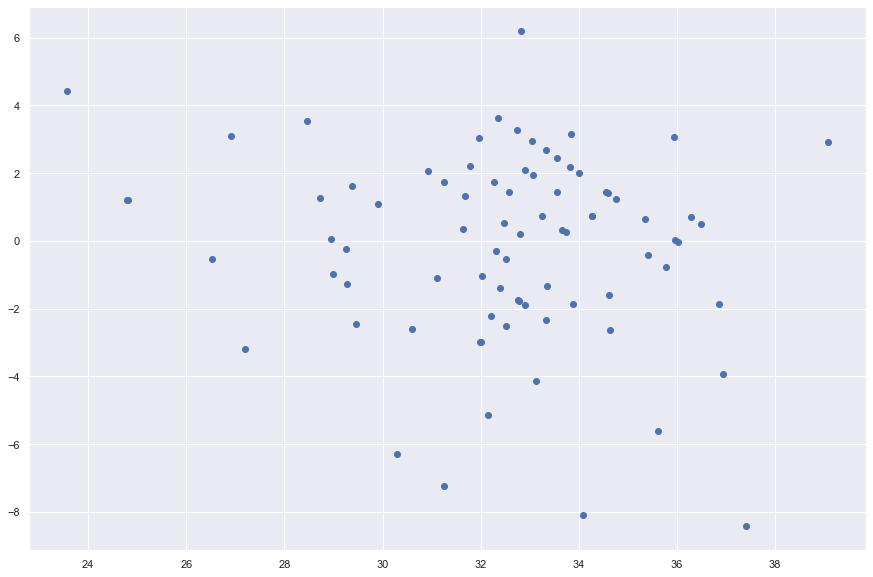

In [89]:
plt.scatter(reg_pred,residuals)

# PERFORMANCE METRICS

In [91]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.79285843729698
2.153225959559591
2.791569171146755


# R SQUARE AND ADJUSTED R SQUARE

In [93]:
score = r2_score(y_test,reg_pred)

In [94]:
score

0.437054696918155

Now we test the accuracy of the model using Adjusted R2

But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,

It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)

But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2

In [95]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3278265037828717

# RIDGE REGRESSION

# Ridge Regression (also called as L2 Regularization),the main aim of ridge regression is to reduce overfitting

In [96]:
ridge=Ridge()

In [97]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [98]:
print(ridge.coef_)

[-0.35498915 -0.22833494 -1.48029097 -0.70374866 -0.24661714  0.85405124
  0.08174868  0.64566072  0.07203342  0.17636996 -0.314502    0.17870778
  0.22535392]


In [99]:
print(ridge.intercept_)

32.074074074074076


In [100]:
ridge_pred=ridge.predict(x_test_scaled)

In [101]:
ridge_pred

array([31.99412337, 33.12040196, 33.34904202, 24.81531826, 29.25317586,
       33.68676155, 31.63059048, 34.61400469, 31.81080916, 32.30710445,
       33.54409223, 33.34199846, 35.75695644, 32.03039126, 34.196428  ,
       33.27080718, 26.56260115, 35.93359951, 33.31573076, 23.60085512,
       32.31428709, 32.51199227, 33.06509029, 32.82454574, 29.89856284,
       32.75584864, 32.90298721, 32.1343128 , 31.97312855, 34.06519694,
       34.59717106, 33.86491378, 34.5259007 , 32.78015204, 31.23264081,
       28.7431667 , 32.55777417, 31.67069931, 33.05264996, 33.9776409 ,
       33.85967669, 35.60302534, 34.26796346, 37.35281757, 32.90360982,
       36.53560291, 32.26187897, 35.34292679, 30.59554534, 31.10728523,
       32.39611356, 39.09427765, 32.7429986 , 34.63335351, 27.23033441,
       36.89104824, 33.84982341, 33.71470698, 29.01228005, 32.45261276,
       32.52613462, 31.98628733, 24.81143025, 36.32031857, 36.06254441,
       28.98050626, 29.42546164, 29.37614081, 35.99109657, 28.46

In [102]:
# Assupmtions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

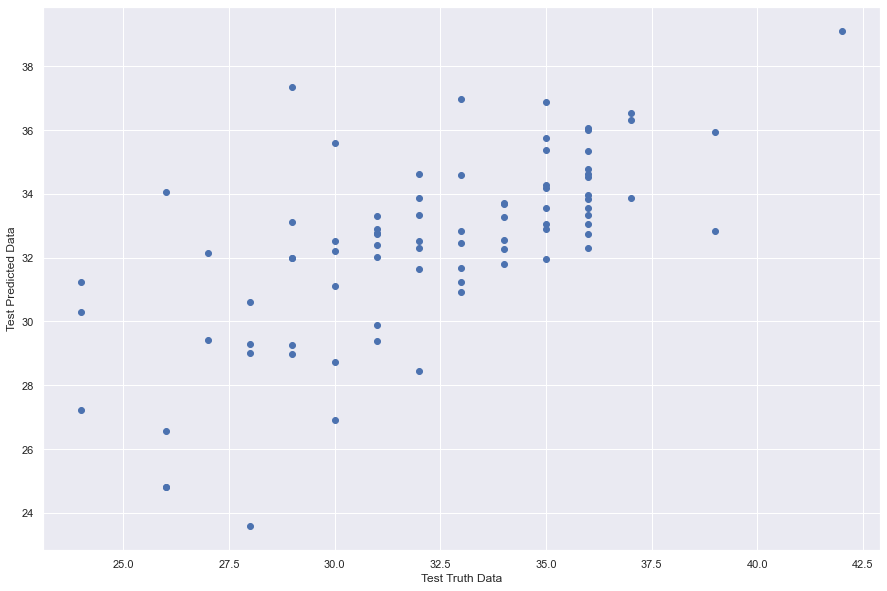

In [103]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [104]:
residuals=y_test-ridge_pred

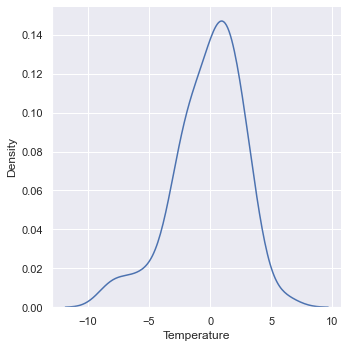

In [105]:
sns.displot(residuals,kind='kde')

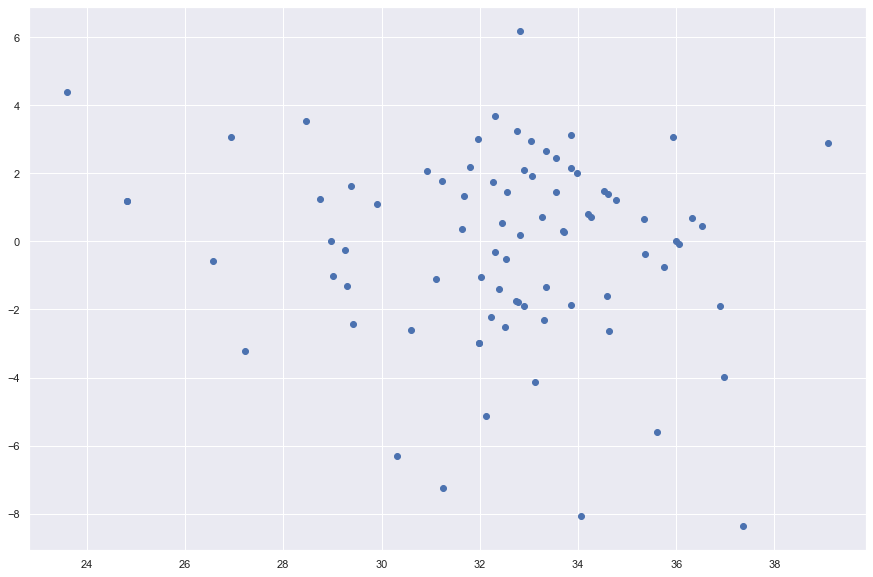

In [106]:
plt.scatter(ridge_pred,residuals)

In [107]:
# Performance Metrics

In [108]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.770134748047855
2.151505587243574
2.787496143144929


In [109]:
#R SQUARE & ADJUSTED R SQUARE

In [110]:
score=r2_score(y_test,reg_pred)
score

0.437054696918155

Now we test the accuracy of the model using Adjusted R2

But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,

It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)

But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2

In [113]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3278265037828717

# LASSO
LASSO Regression(also called as L1 Norm/L1 Regularization),the main aim of LASSO regressio is to reduce the features which are least correlated with dependent variables .

If our datasets has outliers we should use LASSO .

In [114]:
lasso=Lasso()
lasso

Lasso()

In [115]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [116]:
print(lasso.coef_)

[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [117]:
print(lasso.intercept_)

32.074074074074076


In [118]:
lasso_pred=lasso.predict(x_test_scaled)
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

In [119]:
#Assupmtions of linear Regression

Text(0, 0.5, 'Test Predicted Data')

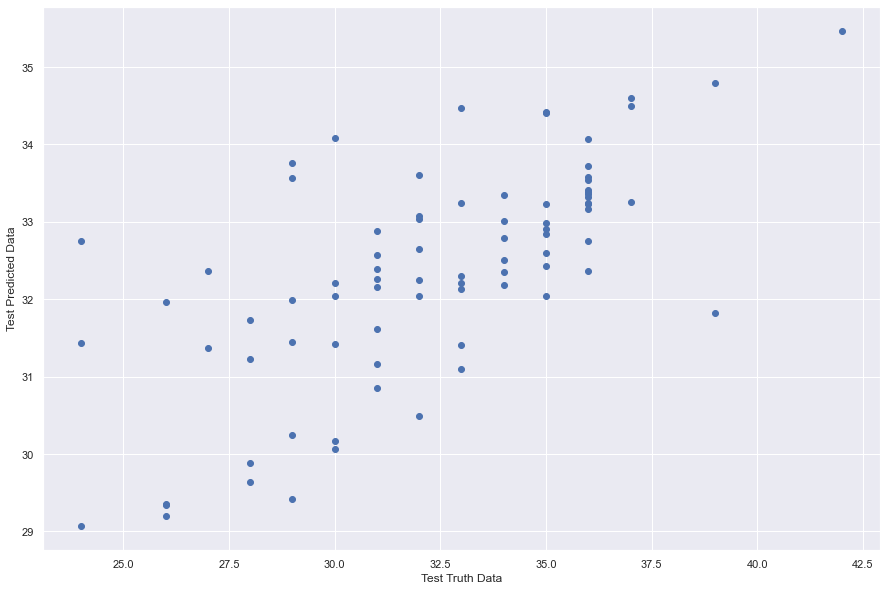

In [120]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [121]:
residuals=y_test-lasso_pred

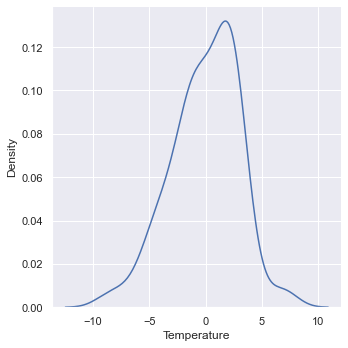

In [122]:
sns.displot(residuals,kind="kde")

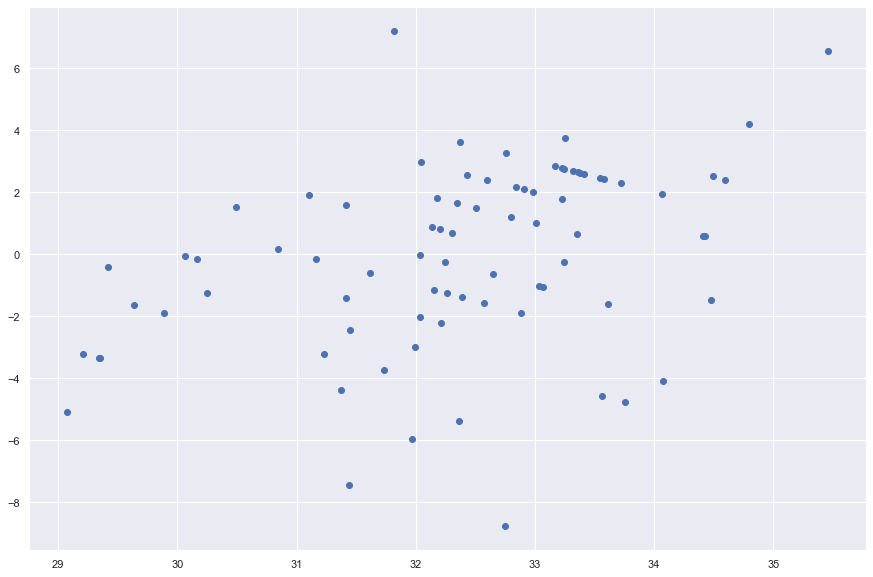

In [123]:
plt.scatter(lasso_pred,residuals)

In [124]:
#Performance Metrics

In [125]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


In [126]:
# RSquare and Adjusted RSquare

In [127]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [128]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.250044602255197

# ELASTICNET

In [129]:
#ElasticNet isCombination of Ridge and Lasso

In [130]:
elastic_net=ElasticNet()

In [131]:
elastic_net.fit(x_train_scaled,y_train)

ElasticNet()

In [132]:
print(elastic_net.coef_)

[ 0.         -0.         -0.7730265  -0.26945253 -0.02396636  0.67644044
  0.10592038  0.          0.18367796  0.03890539  0.10736141  0.12263291
  0.        ]


In [133]:
elastic_net_pred=elastic_net.predict(x_test_scaled)

In [134]:
elastic_net_pred

array([32.07409039, 33.29293313, 33.39263218, 28.69961366, 29.49374905,
       33.25881227, 31.64944534, 33.96769667, 32.19566374, 32.6253187 ,
       32.53967421, 32.79104134, 34.34008686, 32.04655715, 32.69212517,
       33.40819207, 29.24666067, 35.09553512, 32.51236162, 28.84719082,
       32.04686673, 31.94146   , 32.90451267, 32.09994982, 30.69117185,
       32.84175353, 32.80749928, 31.70511919, 31.74844972, 32.57412681,
       33.4332043 , 33.07529204, 33.29587412, 32.70094519, 31.5247729 ,
       29.86224568, 32.20245403, 31.65054472, 33.31130095, 32.77809367,
       33.63822223, 34.12018474, 33.53213032, 34.40329859, 32.8685631 ,
       35.48710781, 31.90216194, 34.21871278, 30.97975835, 31.50089875,
       32.42299224, 36.61434905, 32.15427936, 33.96759058, 29.12343931,
       35.27201784, 33.49130546, 32.46770779, 29.82387004, 32.19644604,
       32.44217857, 31.33525761, 28.36842114, 35.09711535, 34.56195088,
       30.26102351, 30.51552991, 30.38246618, 34.74948956, 29.81

In [135]:
#Assumptions of Linear regression

Text(0, 0.5, 'Test Predicted Data')

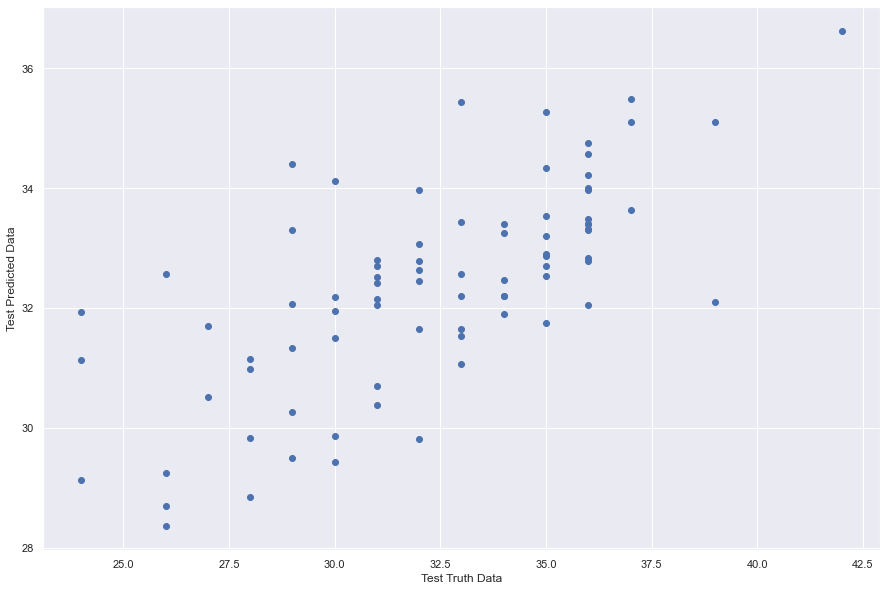

In [136]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [137]:
residuals=y_test-elastic_net_pred

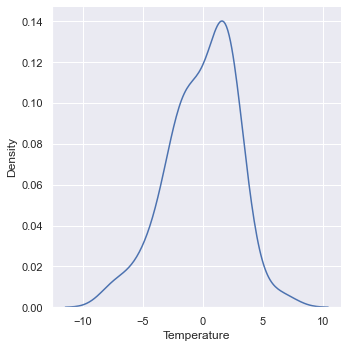

In [138]:
sns.displot(residuals,kind='kde')

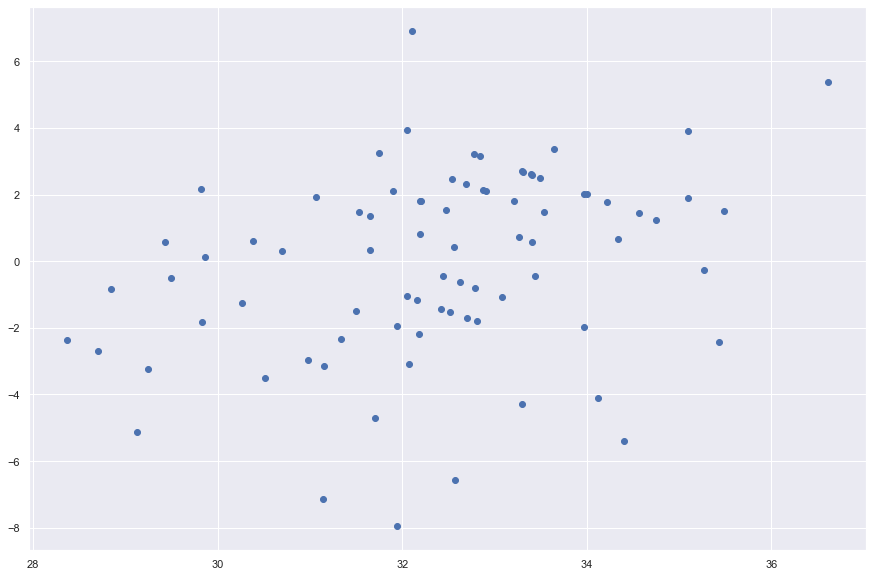

In [139]:
plt.scatter(elastic_net_pred,residuals)

In [140]:
#Performance Metrics

In [141]:
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

7.915513754032116
2.286670095063569
2.8134522839444274


In [142]:
#R Square and Adjusted R Square

In [143]:
score=r2_score(y_test,elastic_net_pred)
score

0.4281942466726337

Now we test the accuracy of the model using Adjusted R2

But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,

It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)

But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2

In [144]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3172468616986671